# Introduction

You may often hear that training a deep learning model may take hours, days, or even weeks. 

![](img/training_model.png)


## Why optimization matters

Indeed, model training is often considered as the most challenging stage for a deep learning task. Essentially, for most machine learning models, the goal of training is to find values of model parameters that minimize a pre-defined loss function. 

Consider the task of classifying an image as either a cat or a dog. Suppose that the training data set consists of images labeled as cats and dogs. With extracted features such as pixel information representing each image, a deep learning model transforms such input features into the likelihoods of being a cat and a dog. Such transformations are essentially linear and nonlinear functions of both input features and model parameters. Note that the input features are given, while the model parameter values are unknown beforehand and shall be obtained after model training.

We can train this model with maximum likelihood estimation. The idea is to maximize the joint likelihood of observing all the labeled cats and dogs in the training data set as transformations from the input image features and model parameters. Equivalently, we define the loss function as the negative log likekihood of the observations in the training data set. We want to find the optimal values of the model parameters that minimize the loss function. To achieve this goal, we rely on optimization algorithms to find such model parameter values. Thus, it is fair to say that optimization plays a key role in training a deep learning model. 

As a brief introduction, we try to keep the mathematical content to the minumum necessary to achieve a proper understanding. The emphasis here is on conveying the underlying concepts rather than mathematical rigour.

## Optimization is usually hard

The pre-defined loss function in the learning problem is also called the objective function for optimization. Conventionally, optimization considers a minimization problem and maxinimizing an objective function can be trivally converted to minimizing the negative of the objective function.

### Local and global minima

An objective function $f(x)$ may have a local minumum $x$, where $f(x)$ is smaller at $x$ than at the neighboring points of $x$. If $f(x)$ is the smallest value that can be obtained in the entire domain of $x$, $f(x)$ is a global mininum.
The following figure demonstrates examples of local and global minima for function 

$$f(x) = x \cdot \text{cos}(\pi x), \qquad -1.0 \leq x \leq 2.0.$$

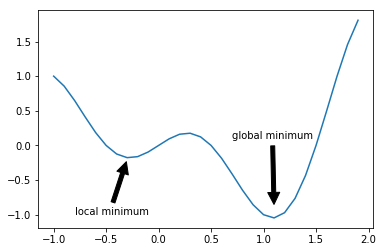

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x * np.cos(np.pi * x)

x = np.arange(-1.0, 2.0, 0.1)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.annotate('local minimum', xy=(-0.3, -0.2), xytext=(-0.8, -1.0),
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('global minimum', xy=(1.1, -0.9), xytext=(0.7, 0.1),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot(x, f(x))
plt.show()

It would be ideal if we can find the solution $x$ that globally optimizes the objective function $f(x)$. For instance, function $f(x) = x^2$ has a global minimum solution at $x = 0$. This is an analytical solution that can be obtained by finding $x = 0$ that sets the derivative of $f(x)$ with respect to $x$ to zero: $f'(x) = 2x = 0$.

However, in practice finding such analytical solutions may not always be feasible. The function $f(x) = x \cdot \text{cos}(\pi x), -1.0 \leq x \leq 2.0$ plotted above is an example of such cases. When an analytical solution is not available, we may resort to a numerical solution that is usually obtained by computers in an iterative manner. 

With a numerical method, it is usually hard to find the global minimum of an objective function. For non-convex functions, a numerical method often halt around local minima that are not necessarily the global minima. Other challenging scenarios include the existence of many saddle points surrounded by flat regions.

### Machine precision constraint

Even though for convex functions where local minima are global ones, it may still be hard to find the precise optimal solutions as constrained by the machine precision.

In computers, numbers are represented in a discrete manner. The accuracy of a floating-point system is characterized by a quantity called machine precision. For IEEE binary floating-point systems, 

* single precision = $2^{-24}$ (about 7 decimal digits of precision)
* double precision = $2^{-53}$ (about 16 decimal digits of precision).

In fact, the precision of a solution to optimization can be worse than the machine precision. To demonstrate that, consider a function $f: \mathbb{R} \rightarrow \mathbb{R}$, its Taylor series exansion is

$$f(x + h) = f(x) + f'(x)h + \frac{f''(x)}{2}h^2 + \mathcal{O}(h^3).$$

Denote the global optimum solution as $x^*$ for minimizing $f(x)$. It usually holds that 

$$f'(x^*) = 0 \quad \text{and} \quad f''(x^*) \neq 0.$$

Thus, for a small value $h$, we have

$$f(x^* + h) \approx f(x^*) + \mathcal{O}(h^2),$$

where the constant coefficient of $\mathcal{O}(h^2)$ is $f''(x)/2$. It means that a small change of order $h$ in the optimum solution $x^*$ will change the value of $f(x^*)$ in the order of $h^2$. In other words, if the precision of the value of the function is constrained by the machine precision, the precision of the value of the solution is constrained by the order of the square root of the machine precision. For example, if the machine precision is $10^{-8}$, the precision of the solution value is in the order of $10^{-4}$, which is worse than the machine precision.

## Finding global optima is not necessary for deep learning

Although finding the precise global optimum solution is hard, it is not necessary for deep learning. In practice, we often aim at finding the solution that makes the objective function very low, and such solutions are not necessarily the global optima.

In fact, many algorithms have solid theoretical guarantees, such as convergence rates, that only encourage their applications to objective functions that are convex. It was considered unprincipled to apply such algorithms to nonconvex problems. However, nowadays many deep learning models have found such optimization algorithms helpful for quickly finding solutions that make the objective function low enough to have useful applications.